# Project Members:
Nuzhat Prova - U01759794
Sunita inderjit - U01911321
Sai Ramya Kasumurthy - U01933225
Srikanth Reddy Yeruva - U01888231

# Midterm Project - Analyzing New York City Data with SQL, Python, and Version Control

The primary objective of the project is to analyze and derive insights from multiple NYPD datasets related to public safety in New York City. Utilizing data science methodologies and tools such as Python for data cleaning and analysis, SQL for data retrieval, and Git for version control, the project aims to uncover patterns and trends in hate crimes, shootings, and arrests. The end goal is to provide actionable insights that can aid in data-driven decision-making for law enforcement agencies and policymakers.

Let's start with the NYPD Hate Crime dataset, our plan is to clean and transform the data for analytical readiness, focusing on handling missing values and ensuring appropriate data types. Subsequently, exploratory data analysis will be conducted to uncover key trends and patterns, such as the distribution of hate crimes over time, common bias motives and prevalent offense categories.

In [13]:
import pandas as pd

# Load the NYPD Hate Crime dataset
file_path = 'NYPD_Hate_Crimes.csv'
df_hate_crimes = pd.read_csv(file_path)

# Show the first few records and summary statistics
df_hate_crimes.head(), df_hate_crimes.describe()

(   Full Complaint ID  Complaint Year Number  Month Number Record Create Date  \
 0    201904612204817                   2019             2         02/08/2019   
 1    201904812229517                   2019             3         03/09/2019   
 2    201904812231317                   2019             3         03/10/2019   
 3    201904812226617                   2019             3         03/08/2019   
 4    201904212405517                   2019             5         05/11/2019   
 
    Complaint Precinct Code Patrol Borough Name County  \
 0                       46   PATROL BORO BRONX  BRONX   
 1                       48   PATROL BORO BRONX  BRONX   
 2                       48   PATROL BORO BRONX  BRONX   
 3                       48   PATROL BORO BRONX  BRONX   
 4                       42   PATROL BORO BRONX  BRONX   
 
   Law Code Category Description           Offense Description  \
 0                        FELONY                FELONY ASSAULT   
 1                   MISDEMEAN

The dataset above has several columns, including 'Full Complaint ID', 'Complaint Year Number', 'Month Number', and others. The numerical summary indicates that we have data for the years ranging from 2019 to 2023, and the complaint precinct code varies as well.

In [14]:
# Check for missing values in each column
missing_values = df_hate_crimes.isnull().sum()
missing_values

Full Complaint ID                   0
Complaint Year Number               0
Month Number                        0
Record Create Date                  0
Complaint Precinct Code             0
Patrol Borough Name                 0
County                              0
Law Code Category Description       0
Offense Description                 0
PD Code Description                 0
Bias Motive Description             0
Offense Category                    0
Arrest Date                      1344
Arrest Id                        1344
dtype: int64

In [15]:
# Impute missing values in 'Arrest Date' and 'Arrest Id' with 'Not Available'
df_hate_crimes['Arrest Date'].fillna('Not Available', inplace=True)
df_hate_crimes['Arrest Id'].fillna('Not Available', inplace=True)

# Convert 'Record Create Date' and 'Arrest Date' to datetime format (where applicable)
df_hate_crimes['Record Create Date'] = pd.to_datetime(df_hate_crimes['Record Create Date'], errors='coerce')
df_hate_crimes['Arrest Date'] = pd.to_datetime(df_hate_crimes['Arrest Date'], errors='coerce')

# Check the data types of all columns to confirm changes
df_hate_crimes.dtypes

Full Complaint ID                         int64
Complaint Year Number                     int64
Month Number                              int64
Record Create Date               datetime64[ns]
Complaint Precinct Code                   int64
Patrol Borough Name                      object
County                                   object
Law Code Category Description            object
Offense Description                      object
PD Code Description                      object
Bias Motive Description                  object
Offense Category                         object
Arrest Date                      datetime64[ns]
Arrest Id                                object
dtype: object

From the above, we can see that the Record Create Date and Arrest Date columns have been successfully converted to datetime format. The missing values in Arrest Date and Arrest Id have been imputed.

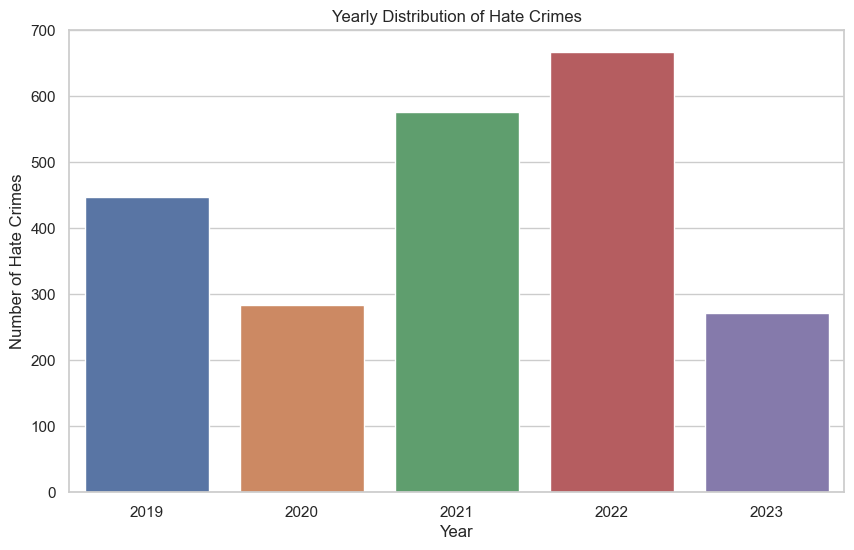

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot the yearly distribution of hate crimes
plt.figure(figsize=(10, 6))
sns.countplot(x='Complaint Year Number', data=df_hate_crimes)
plt.title('Yearly Distribution of Hate Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.show()

The plot above shows the yearly distribution of hate crimes. This help us understand trends over time, for instance, in 2022 Number of Hate Crimes increased significantly.

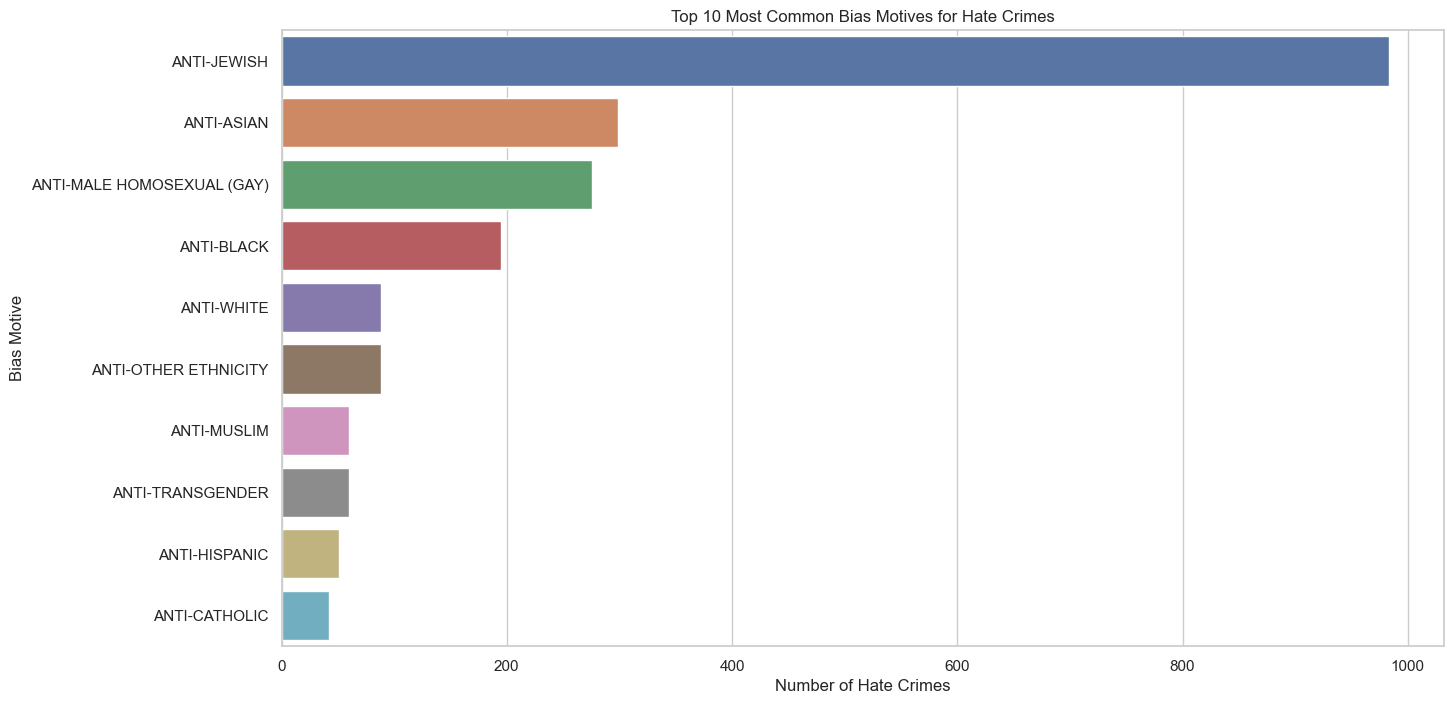

In [17]:
# Plot the top 10 most common bias motives
plt.figure(figsize=(15, 8))
sns.countplot(y='Bias Motive Description', data=df_hate_crimes, order = df_hate_crimes['Bias Motive Description'].value_counts().index[:10])
plt.title('Top 10 Most Common Bias Motives for Hate Crimes')
plt.xlabel('Number of Hate Crimes')
plt.ylabel('Bias Motive')
plt.show()

The plot above shows the top 10 most common bias motives behind hate crimes. This type of analysis can help identify the most prevalent forms of prejudice and hatred, which is valuable for focused interventions.The plot shows the most common offense categories associated with hate crimes. This information is useful for understanding the types of incidents that are most frequently reported, which can guide both preventative measures and response strategies.

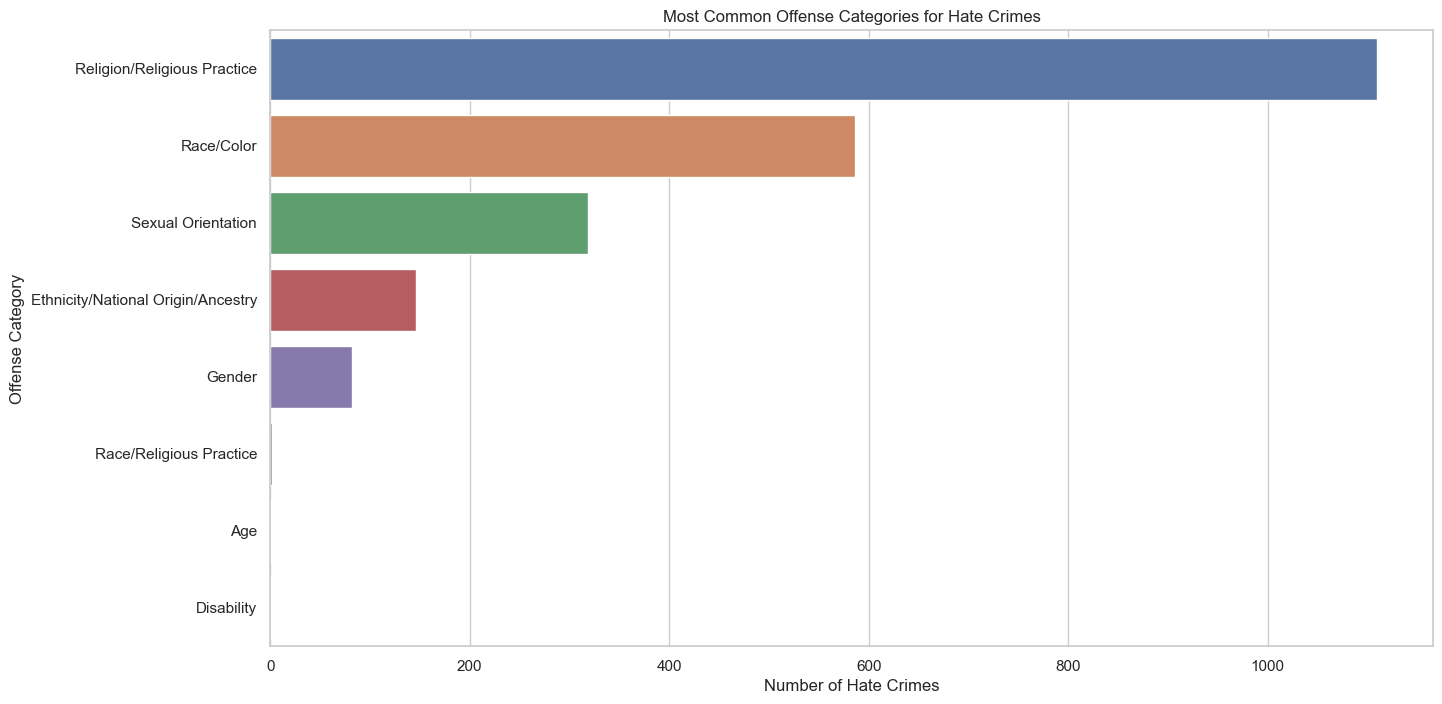

In [18]:
# Plot the most common offense categories
plt.figure(figsize=(15, 8))
sns.countplot(y='Offense Category', data=df_hate_crimes, order = df_hate_crimes['Offense Category'].value_counts().index)
plt.title('Most Common Offense Categories for Hate Crimes')
plt.xlabel('Number of Hate Crimes')
plt.ylabel('Offense Category')
plt.show()

The plot shows the most common offense categories associated with hate crimes. This information is useful for understanding the types of incidents that are most frequently reported, which can guide both preventative measures and response strategies.